In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal
from scipy.fftpack import fft, fftshift, fftfreq, ifft, dct, idct
from scipy.signal import savgol_filter
from scipy import integrate
import numpy as np
import os  
import csv
from scipy import stats

In [2]:
data_name = 'temporal_fulldata_220801.dat'
full_data = pd.read_csv(data_name, sep='\s+',header = 0)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

full_data

,ID,GRBname,TiG1,T100G1,T5G1,dT5G1,T90G1,dT90G1,T25G1,dT25G1,T50G1,dT50G1,TiG2,T100G2,T5G2,dT5G2,T90G2,dT90G2,T25G2,dT25G2,T50G2,dT50G2,TiG3,T100G3,T5G3,dT5G3,T90G3,dT90G3,T25G3,dT25G3,T50G3,dT50G3,TiG1G2,T100G1G2,T5G1G2,dT5G1G2,T90G1G2,dT90G1G2,T25G1G2,dT25G1G2,T50G1G2,dT50G1G2,TiG2G3,T100G2G3,T5G2G3,dT5G2G3,T90G2G3,dT90G2G3,T25G2G3,dT25G2G3,T50G2G3,dT50G2G3,TiG1G2G3,T100G1G2G3,T5G1G2G3,dT5G1G2G3,T90G1G2G3,dT90G1G2G3,T25G1G2G3,dT25G1G2G3,T50G1G2G3,dT50G1G2G3,Redshift,zTiG1,zT100G1,zT5G1,dzT5G1,zT90G1,dzT90G1,zT25G1,dzT25G1,zT50G1,dzT50G1,zTiG2,zT100G2,zT5G2,dzT5G2,zT90G2,dzT90G2,zT25G2,dzT25G2,zT50G2,dzT50G2,zTiG3,zT100G3,zT5G3,dzT5G3,zT90G3,dzT90G3,zT25G3,dzT25G3,zT50G3,dzT50G3,zTiG1G2,zT100G1G2,zT5G1G2,dzT5G1G2,zT90G1G2,dzT90G1G2,zT25G1G2,dzT25G1G2,zT50G1G2,dzT50G1G2,zTiG2G3,zT100G2G3,zT5G2G3,dzT5G2G3,zT90G2G3,dzT90G2G3,zT25G2G3,dzT25G2G3,zT50G2G3,dzT50G2G3,zTiG1G2G3,zT100G1G2G3,zT5G1G2G3,dzT5G1G2G3,zT90G1G2G3,dzT90G1G2G3,zT25G1G2G3,dzT25G1G2G3,zT50G1G2G3,dzT50G1G2G3
0,459,GRB970228,-0.068,117.828,0.302,0.049,115.922,4.084,1.776,0.129,53.776,11.447,-0.438,54.070,0.004,0.025,51.004,3.847,0.656,0.057,38.832,1.782,-0.014,2.142,0.032,0.020,1.840,0.340,0.212,0.047,1.020,0.398,-0.466,56.594,0.034,0.034,53.150,3.112,0.848,0.072,40.368,2.256,-0.456,56.584,-0.002,0.024,53.442,2.891,0.592,0.048,39.280,2.556,-0.458,56.586,0.024,0.033,53.800,2.912,0.768,0.064,40.384,2.342,0.695000,-0.040117994100295,69.5150442477876,0.178171091445428,0.0289085545722714,68.3905604719764,2.4094395280236,1.04778761061947,0.0761061946902655,31.7262536873156,6.75339233038348,-0.258407079646018,31.8997050147493,0.00235988200589971,0.0147492625368732,30.0908554572271,2.26961651917404,0.387020648967552,0.0336283185840708,22.9097345132743,1.05132743362832,-0.00825958702064897,1.26371681415929,0.0188790560471976,0.0117994100294985,1.08554572271386,0.200589970501475,0.125073746312684,0.0277286135693215,0.601769911504425,0.234808259587021,-0.274926253687316,33.388790560472,0.0200589970501475,0.0200589970501475,31.3569321533923,1.83598820058997,0.500294985250737,0.0424778761061947,23.8159292035398,1.33097345132743,-0.269027,33.382891,-0.00117994100294985,0.0141592920353982,31.529203539823,1.70560471976401,0.349262536873156,0.0283185840707965,23.1740412979351,1.50796460176991,-0.270206489675516,33.3840707964602,0.0141592920353982,0.0194690265486726,31.740412979351,1.71799410029499,0.453097345132743,0.0377581120943953,23.8253687315634,1.38171091445428
1,539,GRB970828,-24.856,226.072,3.760,0.750,141.904,15.000,17.504,0.493,56.160,1.964,-4.248,194.200,1.152,0.188,94.272,16.033,9.040,0.232,27.120,7.263,-2.776,70.424,0.560,0.252,56.464,3.421,5.152,0.248,16.736,0.520,-5.720,194.904,2.496,0.161,127.808,7.985,12.992,0.209,48.192,1.298,-4.248,94.936,0.864,0.112,66.208,2.781,7.680,0.161,17.792,0.310,-5.720,196.184,2.064,0.152,125.936,8.586,11.584,0.216,45.632,0.986,0.957800,-12.6958831341301,115.472469097967,1.92052303606088,0.383083052405762,72.4813566247829,7.66166104811523,8.94064766574727,0.251813259781387,28.6852589641434,1.00316681989989,-2.16978240882623,99.1929717029319,0.58841556849525,0.0960261518030442,48.1520073551946,8.18929410562877,4.61742772499745,0.118500357544182,13.8522831749923,3.7097762794974,-1.41791807130453,35.9709878434978,0.286035345796302,0.128715905608336,28.8405352947186,1.74736949637348,2.63152518132598,0.126672795995505,8.54837062008377,0.265604249667995,-2.92164674634794,99.5525589947901,1.27490039840637,0.0822351619164368,65.2814383491674,4.07855756461334,6.63602002247421,0.106752477270406,24.6153846153846,0.662989069363571,-2.169782,48.491164,0.441311676371437,0.0572070691592604,33.8175503115742,1.42047195832056,3.922770456635,0.0822351619164368,9.08775155787108,0.158340994994381,-2.92164674634794,100.206354070896,1.05424456022066,0.0776381652875677,64.3252630503627,4.38553478394116,5.91684543875779,0.110327919092859,23.3077944631729,0.503626519562774
2,612,GRB971214,-9.060,35.652,-9.060,2.082,33.348,3.036,-3.172,3.063,11.732,5.003,-9.060,17.

In [3]:
data_name = 'energy_k-corr_st_restPCRscale_newDRM.dat'
energy_data = pd.read_csv(data_name, sep='\s+',header = 0)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

energy_data

,ID,GCNname,Type,ModelInt,fluence,dfluenceDn,dfluenceUp,ModelPeak,Tpeak,PeakFlux,dPeakFluxDn,dPeakFluxUp,redshift,Eiso,dEiso,EpIntICS,dEpIntICSDn,dEpIntICSUp,Liso,dLiso,EpPeakICS,dEpPeakICSDn,dEpPeakICSUp,tj,dtjDn,dtjUp,tjType,Medium,ref,thetaHM,dthetaHM,CollimationHM,dCollimationHM,EgammaHM,dEgammaHM,LpeakHM,dLpeakHM,thetaWM,dthetaWM,CollimationWM,dCollimationWM,EgammaWM,dEgammaWM,LpeakWM,dLpeakWM,CollimationGM,dCollimationGM,EgammaGM,dEgammaGM,LpeakGM,dLpeakGM,Collimation,dCollimation,Egamma,dEgamma,Lpeak,dLpeak
0,459,GRB970228,II,CPL,0.000008,-5.020000e-07,6.388000e-07,CPL,0.118,4.222000e-06,-7.123000e-07,8.293000e-07,0.695000,1.189000e+52,9.650000e+50,281,-38,56,9.752000e+51,1.790000e+51,503,-90,142,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NaN,NaN,NaN,NaN
1,539,GRB970828,II,GRBM,0.000104,-7.892000e-06,8.111000e-06,GRBM,20.416,6.190000e-06,-7.641000e-07,7.832000e-07,0.957800,2.668000e+53,2.060000e+52,506,-37,40,3.122000e+52,3.904000e+51,509,-49,54,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NaN,NaN,NaN,NaN
2,612,GRB971214,II,CPL,0.000006,-2.314000e-07,2.528000e-07,CPL,-0.280,7.122000e-07,-1.186000e-07,1.205000e-07,3.418000,1.508000e+53,6.256000e+51,790,-67,82,8.027000e+52,1.349000e+52,790,-67,82,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NaN,NaN,NaN,NaN
3,907,GRB990123,II,GRBM,0.000408,-2.846000e-05,2.793000e-05,CPL,5.984,2.767000e-05,-1.594000e-06,1.617000e-06,1.600400,2.791000e+54,1.929000e+53,1476,-96,104,4.895000e+53,2.840000e+52,2928,-144,153,2.06,-0.83,0.83,optical/nir,wind,Zeh2006,0.0617754959310669,0.00934903503908313,0.00191,0.000621,5.324e+51,1.643e+51,9.336e+50,2.829e+50,0.0311180216207558,0.00318021756383292,0.000484,0.000104,1.351e+51,2.781e+50,2.370e+50,5.052e+49,0.000961,0.000187,2.682e+51,4.974e+50,4.703e+50,8.713e+49,0.000484,0.000104,1.351000e+51,2.781000e+50,2.370000e+50,5.052000e+49
4,977,GRB990506,II,GRBM,0.000262,-1.504000e-05,1.527000e-05,GRBM,87.360,1.237000e-05,-7.398000e-07,7.543000e-07,1.306580,1.254000e+54,7.269000e+52,637,-47,50,1.361000e+53,8.241000e+51,457,-23,23,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NaN,NaN,NaN,NaN
5,980,GRB990510,II,CPL,0.000021,-9.750000e-07,1.067000e-06,GRBM,44.544,4.658000e-06,-5.358000e-07,5.557000e-07,1.618700,1.672000e+53,8.884000e+51,366,-25,30,8.664000e+52,1.017000e+52,440,-39,44,1.31,-0.07,0.07,optical/nir,ISM,Zeh2006,0.0739224281439745,0.00156054110456235,0.00273,0.000116,4.566e+50,3.148e+49,2.366e+50,1.035e+49,0.0560728592944025,0.00105643552669977,0.00157,5.98e-05,2.627e+50,1.310e+49,1.362e+50,1.778e+49,0.00207,5.92e-05,3.463e+50,1.474e+49,1.795e+50,1.236e+49,0.00273,0.000116,4.566000e+50,3.148000e+49,2.366000e+50,1.035000e+49
6,1008,GRB990705,II,GRBM,0.000111,-4.398000e-06,4.556000e-06,GRBM,15.824,8.584000e-06,-8.412000e-07,8.918000e-07,0.842400,2.228000e+53,8.952000e+51,530,-15,15,3.150000e+52,3.181000e+51,535,-35,34,1,--,--,optical,--,Masetti2000,0.073529566981903,0.00552706500357605,0.0027,0.000421,6.021e+50,9.306e+49,8.512e+49,1.288e+49,0.0532609621745048,0.00271624015414667,0.00142,0.000148,3.160e+50,3.256e+49,4.467e+49,4.623e+48,0.00196,0.000184,4.362e+50,4.051e+49,6.166e+49,5.653e+48,0.00196,0.000184,4.362000e+50,4.051000e+49,6.166000e+49,5.653000e+48
7,1011,GRB990712,II,CPL,0.000006,-4.072000e-07,4.794000e-07,CPL,11.504,1.089000e-06,-1.724000e-07,1.918000e-07,0.433100,3.916000e+51,3.186000e+50,154,-16,21,1.224000e+51,2.246000e+50,56,-16,11,1.61,-0.19,0.19,optical,--,Bjornsson2001,0.160078159884987,0.00726882211518865,0.0128,0.00118,5.006e+49,6.899e+48,1.565e+49,2.835e+48,0.175461769699837,0.00628746907163855,0.0154,0.00112,6.012e+49,5.986e+48,1.880e+49,4.014e+48,0.014,0.000825,5.486e+49,4.664e+48,1.715e+49,2.402e+48,0.014,0.000825,5.486000e+49,4.664000e+48,1.715000e+49,2.402000e+48
8,1159,GRB991208,II,GRBM,0.000159,-4.683000e-06,4.680000e-06,GRBM,56.960,2.249000e-

In [4]:
result = pd.concat([full_data, energy_data], axis=1, join="inner")
result = result.loc[:,~result.columns.duplicated()]
# result.T50G1G2[result.ID==3639] = result.T50G2[result.ID==3639]
result

,ID,GRBname,TiG1,T100G1,T5G1,dT5G1,T90G1,dT90G1,T25G1,dT25G1,T50G1,dT50G1,TiG2,T100G2,T5G2,dT5G2,T90G2,dT90G2,T25G2,dT25G2,T50G2,dT50G2,TiG3,T100G3,T5G3,dT5G3,T90G3,dT90G3,T25G3,dT25G3,T50G3,dT50G3,TiG1G2,T100G1G2,T5G1G2,dT5G1G2,T90G1G2,dT90G1G2,T25G1G2,dT25G1G2,T50G1G2,dT50G1G2,TiG2G3,T100G2G3,T5G2G3,dT5G2G3,T90G2G3,dT90G2G3,T25G2G3,dT25G2G3,T50G2G3,dT50G2G3,TiG1G2G3,T100G1G2G3,T5G1G2G3,dT5G1G2G3,T90G1G2G3,dT90G1G2G3,T25G1G2G3,dT25G1G2G3,T50G1G2G3,dT50G1G2G3,Redshift,zTiG1,zT100G1,zT5G1,dzT5G1,zT90G1,dzT90G1,zT25G1,dzT25G1,zT50G1,dzT50G1,zTiG2,zT100G2,zT5G2,dzT5G2,zT90G2,dzT90G2,zT25G2,dzT25G2,zT50G2,dzT50G2,zTiG3,zT100G3,zT5G3,dzT5G3,zT90G3,dzT90G3,zT25G3,dzT25G3,zT50G3,dzT50G3,zTiG1G2,zT100G1G2,zT5G1G2,dzT5G1G2,zT90G1G2,dzT90G1G2,zT25G1G2,dzT25G1G2,zT50G1G2,dzT50G1G2,zTiG2G3,zT100G2G3,zT5G2G3,dzT5G2G3,zT90G2G3,dzT90G2G3,zT25G2G3,dzT25G2G3,zT50G2G3,dzT50G2G3,zTiG1G2G3,zT100G1G2G3,zT5G1G2G3,dzT5G1G2G3,zT90G1G2G3,dzT90G1G2G3,zT25G1G2G3,dzT25G1G2G3,zT50G1G2G3,dzT50G1G2G3,GCNname,Type,ModelInt,fluence,dfluenceDn,dfluenceUp,ModelPeak,Tpeak,PeakFlux,dPeakFluxDn,dPeakFluxUp,redshift,Eiso,dEiso,EpIntICS,dEpIntICSDn,dEpIntICSUp,Liso,dLiso,EpPeakICS,dEpPeakICSDn,dEpPeakICSUp,tj,dtjDn,dtjUp,tjType,Medium,ref,thetaHM,dthetaHM,CollimationHM,dCollimationHM,EgammaHM,dEgammaHM,LpeakHM,dLpeakHM,thetaWM,dthetaWM,CollimationWM,dCollimationWM,EgammaWM,dEgammaWM,LpeakWM,dLpeakWM,CollimationGM,dCollimationGM,EgammaGM,dEgammaGM,LpeakGM,dLpeakGM,Collimation,dCollimation,Egamma,dEgamma,Lpeak,dLpeak
0,459,GRB970228,-0.068,117.828,0.302,0.049,115.922,4.084,1.776,0.129,53.776,11.447,-0.438,54.070,0.004,0.025,51.004,3.847,0.656,0.057,38.832,1.782,-0.014,2.142,0.032,0.020,1.840,0.340,0.212,0.047,1.020,0.398,-0.466,56.594,0.034,0.034,53.150,3.112,0.848,0.072,40.368,2.256,-0.456,56.584,-0.002,0.024,53.442,2.891,0.592,0.048,39.280,2.556,-0.458,56.586,0.024,0.033,53.800,2.912,0.768,0.064,40.384,2.342,0.695000,-0.040117994100295,69.5150442477876,0.178171091445428,0.0289085545722714,68.3905604719764,2.4094395280236,1.04778761061947,0.0761061946902655,31.7262536873156,6.75339233038348,-0.258407079646018,31.8997050147493,0.00235988200589971,0.0147492625368732,30.0908554572271,2.26961651917404,0.387020648967552,0.0336283185840708,22.9097345132743,1.05132743362832,-0.00825958702064897,1.26371681415929,0.0188790560471976,0.0117994100294985,1.08554572271386,0.200589970501475,0.125073746312684,0.0277286135693215,0.601769911504425,0.234808259587021,-0.274926253687316,33.388790560472,0.0200589970501475,0.0200589970501475,31.3569321533923,1.83598820058997,0.500294985250737,0.0424778761061947,23.8159292035398,1.33097345132743,-0.269027,33.382891,-0.00117994100294985,0.0141592920353982,31.529203539823,1.70560471976401,0.349262536873156,0.0283185840707965,23.1740412979351,1.50796460176991,-0.270206489675516,33.3840707964602,0.0141592920353982,0.0194690265486726,31.740412979351,1.71799410029499,0.453097345132743,0.0377581120943953,23.8253687315634,1.38171091445428,GRB970228,II,CPL,0.000008,-5.020000e-07,6.388000e-07,CPL,0.118,4.222000e-06,-7.123000e-07,8.293000e-07,0.695000,1.189000e+52,9.650000e+50,281,-38,56,9.752000e+51,1.790000e+51,503,-90,142,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NaN,NaN,NaN,NaN
1,539,GRB970828,-24.856,226.072,3.760,0.750,141.904,15.000,17.504,0.493,56.160,1.964,-4.248,194.200,1.152,0.188,94.272,16.033,9.040,0.232,27.120,7.263,-2.776,70.424,0.560,0.252,56.464,3.421,5.152,0.248,16.736,0.520,-5.720,194.904,2.496,0.161,127.808,7.985,12.992,0.209,48.192,1.298,-4.248,94.936,0.864,0.112,66.208,2.781,7.680,0.161,17.792,0.310,-5.720,196.184,2.064,0.152,125.936,8.586,11.584,0.216,45.632,0.986,0.957800,-12.6958831341301,115.472469097967,1.92052303606088,0.383083052405762,72.4813566247829,7.66166104811523,8.94064766574727,0.251813259781387,28.6852589641434,1.00316681989989,-2.16978240882623,99.1929717029319,0.58841556849525,0.0960261518030442,48.1520073551946,8.18929410562877,4.61742772499745,0.118500357544182,1

In [7]:
factor = 10 #width of boxcar`s window
ms = 0.064 #timescale (seconds)
MS = 64 #timescale (mseconds)

In [8]:
#Functions for reichart variab estimator
def koef(Nx, N): #the function creates a vector of coefficients expressed from the formula for convolution
    nx = int((Nx-1)/2)
    a = [1/Nx]*(N-1)
    a[0] = 1/Nx*((Nx-1)/2 - nx)
    a.append(1/Nx*((Nx-1)/2 - nx))
    return(a)

def list_key(two_dim): 
    return two_dim[1] # return second parameter in two_dim

# Cycle

In [11]:
VR01_list = []
V_list = []
print('timescale: 64ms')
print("{:^4} {:^13} {:^13} {:^13} {:^13} {:^13} {:^13}".format('ID', 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3'))

with open("variability_full.txt",  mode="w") as outfile:
#     file_writer = csv.writer(w_file, delimiter = ",", lineterminator="\r")
#     file_writer.writerow(["GRB name", "z, redshift", "V(Fenimore) f=0.5", "V(Reichart) f=0.5"])
#     file_writer = csv.writer(w_file, delimiter = ",", lineterminator="\r")
#     file_writer.writerow(["GRB name", "z, redshift", "V(Fenimore) f=0.5", "V(Reichart) f=0.5"])
    print("GRB_name", "redshift", "V_Fenimore", "V_Reichart")
    for i in range (len(result)):
        if result.ID[i] == 1428 or result.ID[i] == 3639 or result.ID[i] == 3678:
            i = i + 1
            continue

        #reading time history as dataframe
        lc_name = "{:04d}".format(result.ID[i])+'.thc'  
        GRB_name = lc_name.replace('.thc','')
        df = pd.read_csv(lc_name, sep='\s+',header = None, skipfooter=1, engine='python') #skipfooter=1 : не читаем последнюю строку, так как там ошибки; engine='python' : сам питон попросил вывести 

        df.columns = ['T1', 'T2', 'G1', 'G2', 'G3']

        dif = df.T1[1] - df.T1[0] #need to V_R01    

        df['G1G2G3'] = df.G1 + df.G2 + df.G3
        df['G1G2'] = df.G1 + df.G2 
        df['G2G3'] = df.G2 + df.G3

        #Background
        bg_name = 'bg' + "{:04d}".format(full_data.ID[i])+'.thi' 
        df_bg = pd.read_csv(bg_name, sep='\s+',header = None) 
        df_bg.columns = ['G1', 'G2', 'G3', 'erG1', 'erG2', 'erG3']   
        df_bg['G1G2G3'] = df_bg.G1 + df_bg.G2 + df_bg.G3
        df_bg['G1G2'] = df_bg.G1 + df_bg.G2 
        df_bg['G2G3'] = df_bg.G2 + df_bg.G3
        df_bg = df_bg*ms 
    #     the light curve with background
    #     fig, axs = plt.subplots(5, 1, figsize=(10,15))
    #     axs[0].set_title(str(full_data.GRBname[i])) 
    #     axs[0].step(df.T1, df.G1G2G3, where = 'post', label = 'G1+G2+G3')
    #     axs[1].step(df.T1, df.G2G3, where = 'post', label = 'G2+G3')
    #     axs[2].step(df.T1, df.G1, where = 'post', label = 'G1')
    #     axs[3].step(df.T1, df.G2, where = 'post', label = 'G2')
    #     axs[4].step(df.T1, df.G3, where = 'post', label = 'G3')

    #     axs[0].axhline(y = df_bg.G1G2G3[0], color='r', linestyle='--')
    #     axs[1].axhline(y = df_bg.G2G3[0], color='r', linestyle='--')
    #     axs[2].axhline(y = df_bg.G1[0], color='r', linestyle='--')
    #     axs[3].axhline(y = df_bg.G2[0], color='r', linestyle='--')
    #     axs[4].axhline(y = df_bg.G3[0], color='r', linestyle='--')

    #     for ax in axs:
    #         ax.legend()
    #     plt.savefig('bg'+ str(full_data.ID[i]))
    #     plt.show()

        #Cp
        Ci = dict(); Cp = dict()
        for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
            Ci[window] = df[window] - np.ones((len(df[window]),))*float(df_bg[window])
            Cp[window] = Ci[window].max()

    #     #boxcar
        T50 = dict(); width = dict(); n_window = dict(); smooth_filter = dict(); Ci_T50 = dict(); Ci_T50_norm = dict()
        T50['G1'] = full_data.T50G1[i]
        T50['G2'] = full_data.T50G2[i]
        T50['G3'] = full_data.T50G3[i]
        T50['G1G2G3'] = full_data.T50G1G2G3[i]
        T50['G1G2'] = full_data.T50G1G2[i]
        T50['G2G3'] = full_data.T50G2G3[i]

        Ci_T50 = dict(); Ci_T50_norm = dict()
        for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
            width[window] = float(T50[window])/factor
            n_window[window] = int(width[window]/ms) + 1
            smooth_filter[window] = signal.boxcar(n_window[window])
            Ci_T50[window] = np.convolve(Ci[window], smooth_filter[window],  mode='same')  #convolve - возвращает свёртку - последовательность произведений эл-ов двух последовательностей
            Ci_T50_norm[window] = Ci_T50[window].copy()/(integrate.trapz(Ci_T50[window].copy()))*(integrate.trapz(Ci[window].copy())) #перенормироовать      

#         fig, axs = plt.subplots(6, 1, figsize=(10,15))
#         axs[0].set_title(full_data.ID[i])
#         for l, window in enumerate(['G1G2G3', 'G1G2', 'G2G3', 'G1', 'G2', 'G3']):
#             axs[l].step(df.T1, Ci[window], where = 'post', label = window)
#             axs[l].plot(df.T1, Ci_T50_norm[window], label = window, color = 'm')
#             axs[l].legend() 
#         plt.show()

        #Savitzky-Golay

        for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
            len_c = len(Ci[window])//2*2-1
            Ci_T50[window] = savgol_filter(Ci[window], len_c, 15)

#         fig, axs = plt.subplots(6, 1, figsize=(10,15))
#         axs[0].set_title(str(full_data.ID[i])) 
#         for l, window in enumerate(['G1G2G3', 'G1G2', 'G2G3', 'G1', 'G2', 'G3']):
#             axs[l].step(df.T1, Ci[window], where = 'post', label = window)
#             axs[l].plot(df.T1, Ci_T50_norm[window], label = window)
#             axs[l].legend()
#         plt.show()

        #Variability(Fenimore)
        V = dict()
        for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
            V[window] = 1/len(df.G2)*(((Ci[window]-Ci_T50_norm[window])**2-df[window])/Cp[window]**2).sum()
        V_list.append(V['G1G2'])
        
        #reichart variab estimator
        #creating a two-dimensional array from T1 and G2
        T1 = list(map(float, df.T1))

        Ci_list = dict(); two_dim = dict(); semi_sum = dict(); comp = dict(); two_dim_f50 = dict(); T1 = dict(); accell = 0

        for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
            Ci_list[window] = list(map(float, Ci[window]))
            two_dim[window] = list(zip(T1, Ci_list[window]))
            Ci_list[window].sort(reverse = True) 
            semi_sum[window] = sum(Ci_list[window])/2 
            comp[window] = 0

            for j in range(len(two_dim[window])): 
                if comp[window] < semi_sum[window]:
                    comp[window] += two_dim[window][j][1]
                else: break
                accell = j

            two_dim_f50[window] = two_dim[window][0: accell + 1]
            two_dim_f50[window].sort()

        listofzeros = [0] * (len(Ci_list['G1'])-len(two_dim_f50['G1']))

        T1_list = dict(); Ci_list2 = dict()

        for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
            T1_list[window] =  [two_dim_f50[window][k][0] for k in range(len(two_dim_f50[window])) ] 
            T1_list[window] = T1_list[window] + listofzeros
            Ci_list2 = [two_dim_f50[window][k][1] for k in range(len(two_dim_f50[window])) ] 

    #     fig, axs = plt.subplots(6, 1, figsize=(10,15))
    #     #plt.xlim([-2, 25])
    #     axs[0].set_title(str(full_data.GRBname[i])) 
    #     for l, window in enumerate(['G1G2G3', 'G1G2', 'G2G3', 'G1', 'G2', 'G3']):
    #         axs[l].step(df.T1, Ci[window], where = 'post', label = window)
    #         axs[l].fill_betweenx(Ci[window], T1_list[window][0], T1_list[window][-1], color = 'm')
    #         axs[l].legend()

    #     plt.savefig(str(full_data.ID[i]) + 'betweenx')

        N = len(Ci_list)
        z = result.Redshift[i]
        beta = 0.6 #const
        N_z = 64*(1+z)**beta/MS

        V_R01 = dict(); sigma_V = dict(); V_R01_list = dict()
        for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
            N_f = len([two_dim_f50[window][i][0] for i in range(len(two_dim_f50[window]))])
            A = koef(N_z-N_f, N)
            B = koef(N_z, N)
            Numer, Denom, numer_term_1, denom_term_1, numer_term_2, denom_term_2  = 0, 0, 0, 0, 0, 0
            for k in range(N):
                Numer += (A[k]*Ci_list[window][k])**2
                Denom += (B[k]*Ci_list[window][k]-df_bg[window])**2
                numer_term_1 += (A[k]*Ci_list[window][k])**2*(A[k]**2*Ci_list[window][k])
                denom_term_1 += (A[k]*Ci_list[window][k])**2 - A[k]**2*Ci_list[window][k]
                numer_term_2 += (B[k]*Ci_list[window][k]-df_bg[window])**2*(B[k]**2*Ci_list[window][k])
                denom_term_2 += (B[k]*Ci_list[window][k]-df_bg[window])**2 - B[k]**2*Ci_list[window][k]
            V_R01[window] = Numer/Denom
            sigma_V[window] = V_R01[window]*(4*N_z*numer_term_1/denom_term_1**2 + 4*N_z* numer_term_2/denom_term_2**2)**(1/2)
        VR01_list.append(V_R01['G1G2'].values[0])
        print("{:04d}".format(result.ID[i]),  "{:6.2f}".format(*V_R01['G1']), "\u00B1", "{:3.2f}".format(*sigma_V['G1']), 
              "{:6.2f}".format(*V_R01['G2']), "\u00B1", "{:3.2f}".format(*sigma_V['G2']),  
              "{:6.2f}".format(*V_R01['G3']), "\u00B1", "{:3.2f}".format(*sigma_V['G3']), 
              "{:6.2f}".format(*V_R01['G1G2G3']), "\u00B1", "{:3.2f}".format(*sigma_V['G1G2G3']),  
              "{:6.2f}".format(*V_R01['G1G2']), "\u00B1", "{:3.2f}".format(*sigma_V['G1G2']),  
              "{:6.2f}".format(*V_R01['G2G3']), "\u00B1", "{:3.2f}".format(*sigma_V['G2G3']) )
        
    #   list_data = [full_data.GRBname[i], full_data.Redshift[i], V['G1G2'], V_R01['G1G2'].values[0]]
    #     with open("variability_full.csv",  'a', newline='') as f_object:
    #         writer_object = writer(f_object)
    #         writer_object.writerow(list_data) 
    #     with open("variability_full.csv",'a') as fd:
    #         fd.write(full_data.GRBname[i], full_data.Redshift[i], V['G1G2'], V_R01['G1G2'])

    #    print(full_data.GRBname[i], full_data.Redshift[i], V['G1G2'], V_R01['G1G2'], file = outfile)

#     with open("variability_full1.csv", 'a') as f:
#         writer = csv.writer(f)
#         writer.writerow(list_data)


timescale: 64ms
 ID       G1            G2            G3          G1G2G3         G1G2          G2G3     
GRB_name redshift V_Fenimore V_Reichart
0459   0.17 ± 0.03   4.57 ± 1.06   1.96 ± 0.67   0.94 ± 0.11   0.83 ± 0.11   4.18 ± 0.68
0539   0.52 ± 0.09   5.55 ± 1.59   3.97 ± 2.02   2.04 ± 0.23   1.51 ± 0.19   5.29 ± 1.31
0612   0.04 ± 0.01   0.27 ± 0.07   0.39 ± 0.19   0.05 ± 0.01   0.05 ± 0.01   0.15 ± 0.04
0907   0.56 ± 0.09   6.22 ± 1.67   3.58 ± 0.96   6.94 ± 0.72   3.94 ± 0.43   5.23 ± 1.03
0977   3.51 ± 0.47   2.13 ± 0.34   3.37 ± 1.36   5.73 ± 0.90   5.86 ± 0.97   2.48 ± 0.39
0980   1.21 ± 0.21   5.99 ± 2.25   3.13 ± 1.44   3.30 ± 0.43   4.04 ± 0.55   9.18 ± 3.33
1008   1.63 ± 0.25   2.40 ± 0.49   3.03 ± 1.21   5.09 ± 0.72   5.20 ± 0.74   2.75 ± 0.52
1011   1.52 ± 0.21   1.28 ± 0.30   0.87 ± 0.37   0.72 ± 0.09   1.02 ± 0.13   0.51 ± 0.12
1159   1.65 ± 0.15   1.20 ± 0.10   1.32 ± 0.25   1.40 ± 0.08   1.40 ± 0.08   1.23 ± 0.09
1163   2.26 ± 0.28   1.15 ± 0.08   1.15 ± 0.13   1.36 

## Variability / Luminosity correlation

In [12]:
result = result.drop([14, 110, 114]) #any problems with these bursts

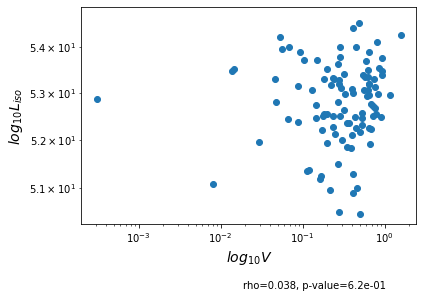

In [15]:
rho, pvalue = stats.spearmanr(result.Liso, VR01_list) #reichart

# plot
fig, ax = plt.subplots()

ax.scatter(np.log10(VR01_list), np.log10(result.Liso))
ax.set_xscale("log")
ax.set_yscale("log")
plt.ylabel('$log_{10}L_{iso}$', fontsize=14)
plt.xlabel('$log_{10}V$', fontsize=14)
plt.figtext(0.5, -0.1, "rho={:.2g}, p-value={:.1e}".format(rho, pvalue))

plt.savefig('variab_reichart')


<function matplotlib.pyplot.show(close=None, block=None)>

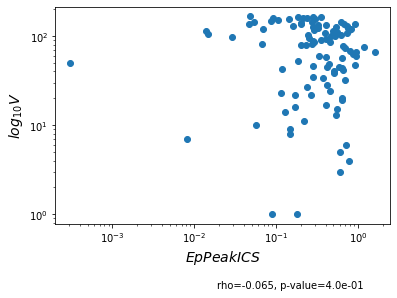

In [19]:
rho, pvalue = stats.spearmanr(result.EpPeakICS, VR01_list) #reichart
#EpPeak = [float(i) for i in result.EpPeakICS]

fig, ax = plt.subplots()

ax.scatter(np.log10(VR01_list), result.EpPeakICS)
ax.set_xscale("log")
ax.set_yscale("log")
plt.xlabel('$EpPeakICS$', fontsize=14)
plt.ylabel('$log_{10}V$', fontsize=14)

plt.figtext(0.5, -0.1, "rho={:.2g}, p-value={:.1e}".format(rho, pvalue))
plt.show

SpearmanrResult(correlation=0.21779105767153864, pvalue=0.004216015697470511)


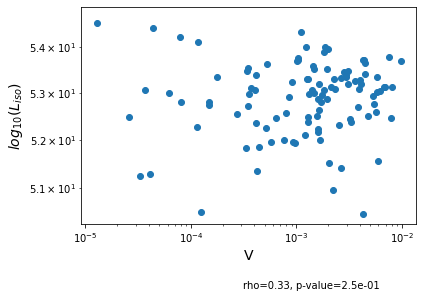

In [30]:
print(stats.spearmanr(result.Liso, V_list)) #fenimore

# plot
fig, ax = plt.subplots()

ax.scatter( V_list, np.log10(result.Liso))
ax.set_xscale("log")
ax.set_yscale("log")
plt.ylabel('$log_{10}(L_{iso})$', fontsize=14)
plt.xlabel('V', fontsize=14)
plt.figtext(0.5, -0.1, "rho={:.2g}, p-value={:.1e}".format(rho, pvalue))

plt.show()

In [23]:
#short/hard (Type I)

files = [] #make a list of the sequence numbers of bursts of the first type
for i, val in enumerate(result.Type):
    if val == 'I' and result.EpPeakICS[i] != '--':
        files.append(i)

for i in files:
    print(result.ID[i])

2639
2775
2815
2886
2951
3174
3246
3269
3384
3785
4128
4234
4341
4418


In [24]:
# 64 timescale
print('timescale: 64ms')
print("{:^4} {:^13} {:^13} {:^13} {:^13} {:^13} {:^13}".format('ID', 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3'))
factor = 6 #width of boxcar`s window
ms = 0.064 #timescale (seconds)
MS = 64 #timescale (mseconds)

V_R01_list_sh = [] #list for variab (Reichart) short/hard GRB in G1G2
V_list_sh = [] #Fenimore

for i in files:
    #reading time history as dataframe
    lc_name = "{:04d}".format(result.ID[i])+'.thc'
    GRB_name = lc_name.replace('.thc','')
    df = pd.read_csv(lc_name, sep='\s+',header = None, skipfooter=1, engine='python')  
    df.columns = ['T1', 'T2', 'G1', 'G2', 'G3']
    dif = df.T1[1] - df.T1[0]    
    df['G1G2G3'] = df.G1 + df.G2 + df.G3
    df['G1G2'] = df.G1 + df.G2 
    df['G2G3'] = df.G2 + df.G3

    #Background
    bg_name = 'bg' + "{:04d}".format(result.ID[i]) + '.thi'  

    df_bg = pd.read_csv(bg_name, sep='\s+',header = None) 

    df_bg.columns = ['G1', 'G2', 'G3', 'erG1', 'erG2', 'erG3']   

    df_bg['G1G2G3'] = df_bg.G1 + df_bg.G2 + df_bg.G3
    df_bg['G1G2'] = df_bg.G1 + df_bg.G2 
    df_bg['G2G3'] = df_bg.G2 + df_bg.G3

    df_bg = df_bg*ms 

#     fig, axs = plt.subplots(5, 1, figsize=(10,15))
#     axs[0].set_title(str(full_data.GRBname[i])) #need an iterable object
#     axs[0].step(df.T1, df.G1G2G3, where = 'post', label = 'G1+G2+G3')
#     axs[1].step(df.T1, df.G2G3, where = 'post', label = 'G2+G3')
#     axs[2].step(df.T1, df.G1, where = 'post', label = 'G1')
#     axs[3].step(df.T1, df.G2, where = 'post', label = 'G2')
#     axs[4].step(df.T1, df.G3, where = 'post', label = 'G3')

#     axs[0].axhline(y = df_bg.G1G2G3[0], color='r', linestyle='--')
#     axs[1].axhline(y = df_bg.G2G3[0], color='r', linestyle='--')
#     axs[2].axhline(y = df_bg.G1[0], color='r', linestyle='--')
#     axs[3].axhline(y = df_bg.G2[0], color='r', linestyle='--')
#     axs[4].axhline(y = df_bg.G3[0], color='r', linestyle='--')

#     for ax in axs:
#         ax.legend()
# #    plt.savefig('bg'+ str(full_data.ID[i]))
#     plt.show()

    #Cp
    Ci = dict(); Cp = dict()
    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        Ci[window] = df[window] - np.ones((len(df[window]),))*float(df_bg[window])
        Cp[window] = Ci[window].max()

#     #boxcar
    T50 = dict(); width = dict(); n_window = dict(); smooth_filter = dict(); Ci_T50 = dict(); Ci_T50_norm = dict()
    T50['G1'] = full_data.T50G1[i]
    T50['G2'] = full_data.T50G2[i]
    T50['G3'] = full_data.T50G3[i]
    T50['G1G2G3'] = full_data.T50G1G2G3[i]
    T50['G1G2'] = full_data.T50G1G2[i]
    T50['G2G3'] = full_data.T50G2G3[i]

    Ci_T50 = dict(); Ci_T50_norm = dict()
    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        width[window] = float(T50[window])/factor
        n_window[window] = int(width[window]/ms) + 1
        smooth_filter[window] = signal.boxcar(n_window[window])
        Ci_T50[window] = np.convolve(Ci[window], smooth_filter[window],  mode='same')  #convolve - возвращает свёртку - последовательность произведений эл-ов двух последовательностей
        #     Ci_T50_norm[window] = Ci_T50[window].copy()/(integrate.trapz(Ci_T50[window].copy(), Ci[window].copy()))*Cp[window] #перенормироовать
        Ci_T50_norm[window] = Ci_T50[window].copy()/(integrate.trapz(Ci_T50[window].copy()))*(integrate.trapz(Ci[window].copy())) #перенормироовать      

#     fig, axs = plt.subplots(6, 1, figsize=(10,15))
#     axs[0].set_title(full_data.ID[i])
#     for l, window in enumerate(['G1G2G3', 'G1G2', 'G2G3', 'G1', 'G2', 'G3']):
#         axs[l].step(df.T1, Ci[window], where = 'post', label = window)
#         axs[l].plot(df.T1, Ci_T50_norm[window], label = window, color = 'm')
#         axs[l].legend() 
#     plt.show()
#        plt.savefig(GRB_name + 'boxcar.png')

    #Savitzky-Golay

    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        len_c = len(Ci[window])//2*2-1
        Ci_T50[window] = savgol_filter(Ci[window], len_c, 15)

#     fig, axs = plt.subplots(6, 1, figsize=(10,15))
#     axs[0].set_title(str(full_data.ID[i])) 
#     for l, window in enumerate(['G1G2G3', 'G1G2', 'G2G3', 'G1', 'G2', 'G3']):
#         axs[l].step(df.T1, Ci[window], where = 'post', label = window)
#         axs[l].plot(df.T1, Ci_T50_norm[window], label = window)
#         axs[l].legend()
#     plt.show()

#       plt.savefig(str(full_data.ID[i]) + 'Savitzky–Golay')

    #Variability(Fenimore)
    V = dict()
    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        V[window] = 1/len(df.G2)*(((Ci[window]-Ci_T50_norm[window])**2-df[window])/Cp[window]**2).sum()
    V_list_sh.append(V['G1G2'])
    
    #reichart variab estimator
    T1 = list(map(float, df.T1))

    Ci_list = dict(); two_dim = dict(); semi_sum = dict(); comp = dict(); two_dim_f50 = dict(); T1 = dict(); accell = 0

    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        Ci_list[window] = list(map(float, Ci[window]))
        two_dim[window] = list(zip(T1, Ci_list[window]))
        Ci_list[window].sort(reverse = True) #массив two_dimG2 отсортирован по убыванию второго элемента (G2)  
        semi_sum[window] = sum(Ci_list[window])/2 #Сумма отсчётов в G2
        comp[window] = 0

        for j in range(len(two_dim[window])): 
            if comp[window] < semi_sum[window]:
                comp[window] += two_dim[window][j][1]
            else: break
            accell = j

        two_dim_f50[window] = two_dim[window][0: accell + 1]
        two_dim_f50[window].sort()

    listofzeros = [0] * (len(Ci_list['G1'])-len(two_dim_f50['G1']))

    T1_list = dict(); Ci_list2 = dict()

    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        T1_list[window] =  [two_dim_f50[window][k][0] for k in range(len(two_dim_f50[window])) ] 
        T1_list[window] = T1_list[window] + listofzeros
        Ci_list2 = [two_dim_f50[window][k][1] for k in range(len(two_dim_f50[window])) ] 

#     fig, axs = plt.subplots(6, 1, figsize=(10,15))
#     #plt.xlim([-2, 25])
#     axs[0].set_title(str(full_data.GRBname[i])) 
#     for l, window in enumerate(['G1G2G3', 'G1G2', 'G2G3', 'G1', 'G2', 'G3']):
#         axs[l].step(df.T1, Ci[window], where = 'post', label = window)
#         axs[l].fill_betweenx(Ci[window], T1_list[window][0], T1_list[window][-1], color = 'm')
#         axs[l].legend()

#     plt.savefig(str(full_data.ID[i]) + 'betweenx')

    N = len(Ci_list)
    z = result.Redshift[i]
    beta = 0.6 #const
    N_z = 64*(1+z)**beta/MS

    V_R01 = dict(); sigma_V = dict(); V_R01_list = dict()
    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        N_f = len([two_dim_f50[window][i][0] for i in range(len(two_dim_f50[window]))])
        A = koef(N_z-N_f, N)
        B = koef(N_z, N)
        Numer, Denom, numer_term_1, denom_term_1, numer_term_2, denom_term_2  = 0, 0, 0, 0, 0, 0
        for k in range(N):
            Numer += (A[k]*Ci_list[window][k])**2
            Denom += (B[k]*Ci_list[window][k]-df_bg[window])**2
            numer_term_1 += (A[k]*Ci_list[window][k])**2*(A[k]**2*Ci_list[window][k])
            denom_term_1 += (A[k]*Ci_list[window][k])**2 - A[k]**2*Ci_list[window][k]
            numer_term_2 += (B[k]*Ci_list[window][k]-df_bg[window])**2*(B[k]**2*Ci_list[window][k])
            denom_term_2 += (B[k]*Ci_list[window][k]-df_bg[window])**2 - B[k]**2*Ci_list[window][k]
        V_R01[window] = Numer/Denom
        sigma_V[window] = V_R01[window]*(4*N_z*numer_term_1/denom_term_1**2 + 4*N_z* numer_term_2/denom_term_2**2)**(1/2)
    V_R01_list_sh.append(V_R01['G1G2'].values[0])
    print("{:04d}".format(result.ID[i]),  "{:6.2f}".format(*V_R01['G1']), "\u00B1", "{:3.2f}".format(*sigma_V['G1']), 
          "{:6.2f}".format(*V_R01['G2']), "\u00B1", "{:3.2f}".format(*sigma_V['G2']),  
          "{:6.2f}".format(*V_R01['G3']), "\u00B1", "{:3.2f}".format(*sigma_V['G3']), 
          "{:6.2f}".format(*V_R01['G1G2G3']), "\u00B1", "{:3.2f}".format(*sigma_V['G1G2G3']),  
          "{:6.2f}".format(*V_R01['G1G2']), "\u00B1", "{:3.2f}".format(*sigma_V['G1G2']),  
          "{:6.2f}".format(*V_R01['G2G3']), "\u00B1", "{:3.2f}".format(*sigma_V['G2G3']) )

timescale: 64ms
 ID       G1            G2            G3          G1G2G3         G1G2          G2G3     
2639   0.04 ± 0.01   0.43 ± 0.13   0.73 ± 0.40   0.05 ± 0.01   0.06 ± 0.01   0.21 ± 0.06
2775   0.21 ± 0.04   1.50 ± 0.39   2.46 ± 1.10   0.27 ± 0.04   0.27 ± 0.04   0.83 ± 0.20
2815   5.15 ± 0.80   1.72 ± 0.27   2.74 ± 0.94   4.13 ± 0.64   4.28 ± 0.73   1.92 ± 0.27
2886   0.19 ± 0.04   6.55 ± 2.76   4.47 ± 2.38   0.95 ± 0.13   1.00 ± 0.15   9.44 ± 3.75
2951   1.66 ± 0.28   2.81 ± 0.71   5.49 ± 2.40   3.86 ± 0.47   4.39 ± 0.57   4.17 ± 1.12
3174   0.10 ± 0.02   3.26 ± 0.91   1.99 ± 0.56   3.79 ± 0.47   1.71 ± 0.23   2.60 ± 0.50
3246   0.22 ± 0.05   2.24 ± 0.66   2.70 ± 0.79   0.89 ± 0.12   0.81 ± 0.12   2.29 ± 0.53
3269   0.10 ± 0.02   1.82 ± 0.61   1.64 ± 0.57   0.35 ± 0.06   0.39 ± 0.07   1.41 ± 0.36
3384   0.24 ± 0.05   2.54 ± 0.62   4.05 ± 1.98   3.58 ± 0.41   2.93 ± 0.37   2.94 ± 0.65
3785   1.08 ± 0.04   1.01 ± 0.02   1.01 ± 0.03   1.03 ± 0.02   1.03 ± 0.02   1.01 ± 0.02
4128 

Text(0.5, -0.1, 'rho=0.33, p-value=2.5e-01')

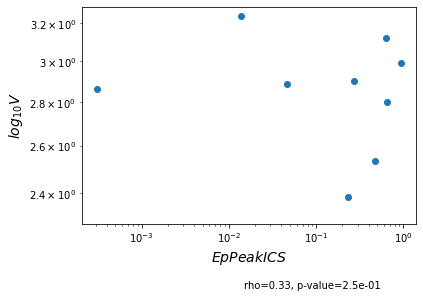

In [29]:
EpPeak = [float(result.EpPeakICS[i]) for i in files]
rho, pvalue = stats.spearmanr(EpPeak,  V_R01_list_sh) #reichart
fig, ax = plt.subplots()

ax.scatter(np.log10(V_R01_list_sh), np.log10(EpPeak))
ax.set_xscale("log")
ax.set_yscale("log")
plt.xlabel('$EpPeakICS$', fontsize=14)
plt.ylabel('$log_{10}V$', fontsize=14)

plt.figtext(0.5, -0.1, "rho={:.2g}, p-value={:.1e}".format(rho, pvalue))

Text(0.5, -0.1, 'rho=0.51, p-value=6.1e-02')

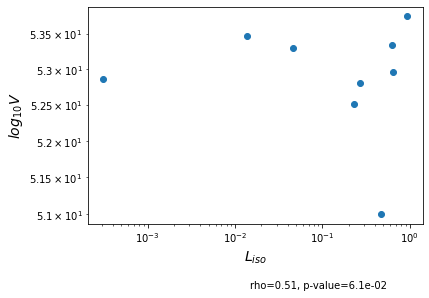

In [31]:
Liso = [result.Liso[i] for i in files]
rho, pvalue = stats.spearmanr(Liso, V_R01_list_sh) #reichart
fig, ax = plt.subplots()

ax.scatter(np.log10(V_R01_list_sh), np.log10(Liso))
ax.set_xscale("log")
ax.set_yscale("log")
plt.xlabel('$L_{iso}$', fontsize=14)
plt.ylabel('$log_{10}V$', fontsize=14)

plt.figtext(0.5, -0.1, "rho={:.2g}, p-value={:.1e}".format(rho, pvalue))

SpearmanrResult(correlation=0.4769230769230769, pvalue=0.0846484341946868)


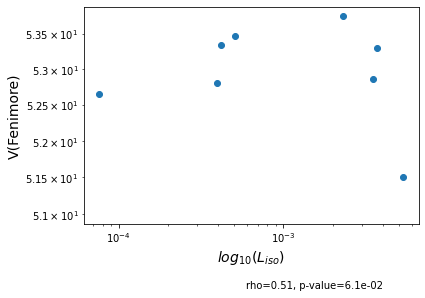

In [34]:
print(stats.spearmanr(Liso, V_list_sh)) #fenimore

fig, ax = plt.subplots()

ax.scatter(V_list_sh, np.log10(Liso))

ax.set_xscale("log")
ax.set_yscale("log")
plt.xlabel('$log_{10}(L_{iso})$', fontsize=14)
plt.ylabel('V(Fenimore)', fontsize=14)
plt.figtext(0.5, -0.1, "rho={:.2g}, p-value={:.1e}".format(rho, pvalue))

plt.show()

In [35]:
#long

files = [] #make a list of burst indexes in the file so that a cycle goes through these indexes later
for i, val in enumerate(result.Type):
    if val == 'II' and i != 14 and i != 110 and i != 114 and result.EpPeakICS[i] != '--':
        files.append(i)        

In [36]:
print('timescale: 64ms')
print("{:^4} {:^13} {:^13} {:^13} {:^13} {:^13} {:^13}".format('ID', 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3'))
factor = 6 #width of boxcar`s window
ms = 0.064 #timescale (seconds)
MS = 64 #timescale (mseconds)

V_R01_list_sh = [] #variability list (Reichart) of short/hard GRB in G1G2
V_list_sh = [] #Fenimore

for i in files:
    #reading time history as dataframe
    lc_name = "{:04d}".format(result.ID[i])+'.thc' 
    GRB_name = lc_name.replace('.thc','')
    df = pd.read_csv(lc_name, sep='\s+',header = None, skipfooter=1, engine='python')  
    df.columns = ['T1', 'T2', 'G1', 'G2', 'G3']
    dif = df.T1[1] - df.T1[0] #need to V_R01    
    df['G1G2G3'] = df.G1 + df.G2 + df.G3
    df['G1G2'] = df.G1 + df.G2 
    df['G2G3'] = df.G2 + df.G3

    #Background
    bg_name = 'bg' + "{:04d}".format(result.ID[i]) + '.thi'  

    df_bg = pd.read_csv(bg_name, sep='\s+',header = None) 

    df_bg.columns = ['G1', 'G2', 'G3', 'erG1', 'erG2', 'erG3']   

    df_bg['G1G2G3'] = df_bg.G1 + df_bg.G2 + df_bg.G3
    df_bg['G1G2'] = df_bg.G1 + df_bg.G2 
    df_bg['G2G3'] = df_bg.G2 + df_bg.G3

    df_bg = df_bg*ms 

#     fig, axs = plt.subplots(5, 1, figsize=(10,15))
#     axs[0].set_title(str(full_data.GRBname[i])) #need an iterable object
#     axs[0].step(df.T1, df.G1G2G3, where = 'post', label = 'G1+G2+G3')
#     axs[1].step(df.T1, df.G2G3, where = 'post', label = 'G2+G3')
#     axs[2].step(df.T1, df.G1, where = 'post', label = 'G1')
#     axs[3].step(df.T1, df.G2, where = 'post', label = 'G2')
#     axs[4].step(df.T1, df.G3, where = 'post', label = 'G3')

#     axs[0].axhline(y = df_bg.G1G2G3[0], color='r', linestyle='--')
#     axs[1].axhline(y = df_bg.G2G3[0], color='r', linestyle='--')
#     axs[2].axhline(y = df_bg.G1[0], color='r', linestyle='--')
#     axs[3].axhline(y = df_bg.G2[0], color='r', linestyle='--')
#     axs[4].axhline(y = df_bg.G3[0], color='r', linestyle='--')

#     for ax in axs:
#         ax.legend()
# #    plt.savefig('bg'+ str(full_data.ID[i]))
#     plt.show()

    #Cp
    Ci = dict(); Cp = dict()
    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        Ci[window] = df[window] - np.ones((len(df[window]),))*float(df_bg[window])
        Cp[window] = Ci[window].max()

#     #boxcar
    T50 = dict(); width = dict(); n_window = dict(); smooth_filter = dict(); Ci_T50 = dict(); Ci_T50_norm = dict()
    T50['G1'] = full_data.T50G1[i]
    T50['G2'] = full_data.T50G2[i]
    T50['G3'] = full_data.T50G3[i]
    T50['G1G2G3'] = full_data.T50G1G2G3[i]
    T50['G1G2'] = full_data.T50G1G2[i]
    T50['G2G3'] = full_data.T50G2G3[i]

    Ci_T50 = dict(); Ci_T50_norm = dict()
    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        width[window] = float(T50[window])/factor
        n_window[window] = int(width[window]/ms) + 1
        smooth_filter[window] = signal.boxcar(n_window[window])
        Ci_T50[window] = np.convolve(Ci[window], smooth_filter[window],  mode='same')  
        Ci_T50_norm[window] = Ci_T50[window].copy()/(integrate.trapz(Ci_T50[window].copy()))*(integrate.trapz(Ci[window].copy())) #перенормироовать      

#     fig, axs = plt.subplots(6, 1, figsize=(10,15))
#     axs[0].set_title(full_data.ID[i])
#     for l, window in enumerate(['G1G2G3', 'G1G2', 'G2G3', 'G1', 'G2', 'G3']):
#         axs[l].step(df.T1, Ci[window], where = 'post', label = window)
#         axs[l].plot(df.T1, Ci_T50_norm[window], label = window, color = 'm')
#         axs[l].legend() 
#     plt.show()
#        plt.savefig(GRB_name + 'boxcar.png')

    #Savitzky-Golay

    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        len_c = len(Ci[window])//2*2-1
        Ci_T50[window] = savgol_filter(Ci[window], len_c, 15)

#     fig, axs = plt.subplots(6, 1, figsize=(10,15))
#     axs[0].set_title(str(full_data.ID[i])) 
#     for l, window in enumerate(['G1G2G3', 'G1G2', 'G2G3', 'G1', 'G2', 'G3']):
#         axs[l].step(df.T1, Ci[window], where = 'post', label = window)
#         axs[l].plot(df.T1, Ci_T50_norm[window], label = window)
#         axs[l].legend()
#     plt.show()

#       plt.savefig(str(full_data.ID[i]) + 'Savitzky–Golay')

    #Variability(Fenimore)
    V = dict()
    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        V[window] = 1/len(df.G2)*(((Ci[window]-Ci_T50_norm[window])**2-df[window])/Cp[window]**2).sum()
    V_list_sh.append(V['G1G2'])
    
    #reichart variab estimator
    T1 = list(map(float, df.T1))

    Ci_list = dict(); two_dim = dict(); semi_sum = dict(); comp = dict(); two_dim_f50 = dict(); T1 = dict(); accell = 0

    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        Ci_list[window] = list(map(float, Ci[window]))
        two_dim[window] = list(zip(T1, Ci_list[window]))
        Ci_list[window].sort(reverse = True) 
        semi_sum[window] = sum(Ci_list[window])/2
        comp[window] = 0

        for j in range(len(two_dim[window])): 
            if comp[window] < semi_sum[window]:
                comp[window] += two_dim[window][j][1]
            else: break
            accell = j

        two_dim_f50[window] = two_dim[window][0: accell + 1]
        two_dim_f50[window].sort()

    listofzeros = [0] * (len(Ci_list['G1'])-len(two_dim_f50['G1']))

    T1_list = dict(); Ci_list2 = dict()

    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        T1_list[window] =  [two_dim_f50[window][k][0] for k in range(len(two_dim_f50[window])) ] 
        T1_list[window] = T1_list[window] + listofzeros
        Ci_list2 = [two_dim_f50[window][k][1] for k in range(len(two_dim_f50[window])) ] 

#     fig, axs = plt.subplots(6, 1, figsize=(10,15))
#     #plt.xlim([-2, 25])
#     axs[0].set_title(str(full_data.GRBname[i])) 
#     for l, window in enumerate(['G1G2G3', 'G1G2', 'G2G3', 'G1', 'G2', 'G3']):
#         axs[l].step(df.T1, Ci[window], where = 'post', label = window)
#         axs[l].fill_betweenx(Ci[window], T1_list[window][0], T1_list[window][-1], color = 'm')
#         axs[l].legend()

#     plt.savefig(str(full_data.ID[i]) + 'betweenx')

    N = len(Ci_list)
    z = result.Redshift[i]
    beta = 0.6 #const
    N_z = 64*(1+z)**beta/MS

    V_R01 = dict(); sigma_V = dict(); V_R01_list = dict()
    for window in 'G1', 'G2', 'G3', 'G1G2G3', 'G1G2', 'G2G3':
        N_f = len([two_dim_f50[window][i][0] for i in range(len(two_dim_f50[window]))])
        A = koef(N_z-N_f, N)
        B = koef(N_z, N)
        Numer, Denom, numer_term_1, denom_term_1, numer_term_2, denom_term_2  = 0, 0, 0, 0, 0, 0
        for k in range(N):
            Numer += (A[k]*Ci_list[window][k])**2
            Denom += (B[k]*Ci_list[window][k]-df_bg[window])**2
            numer_term_1 += (A[k]*Ci_list[window][k])**2*(A[k]**2*Ci_list[window][k])
            denom_term_1 += (A[k]*Ci_list[window][k])**2 - A[k]**2*Ci_list[window][k]
            numer_term_2 += (B[k]*Ci_list[window][k]-df_bg[window])**2*(B[k]**2*Ci_list[window][k])
            denom_term_2 += (B[k]*Ci_list[window][k]-df_bg[window])**2 - B[k]**2*Ci_list[window][k]
        V_R01[window] = Numer/Denom
        sigma_V[window] = V_R01[window]*(4*N_z*numer_term_1/denom_term_1**2 + 4*N_z* numer_term_2/denom_term_2**2)**(1/2)
    V_R01_list_sh.append(V_R01['G1G2'].values[0])
    print("{:04d}".format(result.ID[i]),  "{:6.2f}".format(*V_R01['G1']), "\u00B1", "{:3.2f}".format(*sigma_V['G1']), 
          "{:6.2f}".format(*V_R01['G2']), "\u00B1", "{:3.2f}".format(*sigma_V['G2']),  
          "{:6.2f}".format(*V_R01['G3']), "\u00B1", "{:3.2f}".format(*sigma_V['G3']), 
          "{:6.2f}".format(*V_R01['G1G2G3']), "\u00B1", "{:3.2f}".format(*sigma_V['G1G2G3']),  
          "{:6.2f}".format(*V_R01['G1G2']), "\u00B1", "{:3.2f}".format(*sigma_V['G1G2']),  
          "{:6.2f}".format(*V_R01['G2G3']), "\u00B1", "{:3.2f}".format(*sigma_V['G2G3']) )

timescale: 64ms
 ID       G1            G2            G3          G1G2G3         G1G2          G2G3     
0459   0.17 ± 0.03   4.57 ± 1.06   1.96 ± 0.67   0.94 ± 0.11   0.83 ± 0.11   4.18 ± 0.68
0539   0.52 ± 0.09   5.55 ± 1.59   3.97 ± 2.02   2.04 ± 0.23   1.51 ± 0.19   5.29 ± 1.31
0612   0.04 ± 0.01   0.27 ± 0.07   0.39 ± 0.19   0.05 ± 0.01   0.05 ± 0.01   0.15 ± 0.04
0907   0.56 ± 0.09   6.22 ± 1.67   3.58 ± 0.96   6.94 ± 0.72   3.94 ± 0.43   5.23 ± 1.03
0977   3.51 ± 0.47   2.13 ± 0.34   3.37 ± 1.36   5.73 ± 0.90   5.86 ± 0.97   2.48 ± 0.39
0980   1.21 ± 0.21   5.99 ± 2.25   3.13 ± 1.44   3.30 ± 0.43   4.04 ± 0.55   9.18 ± 3.33
1008   1.63 ± 0.25   2.40 ± 0.49   3.03 ± 1.21   5.09 ± 0.72   5.20 ± 0.74   2.75 ± 0.52
1011   1.52 ± 0.21   1.28 ± 0.30   0.87 ± 0.37   0.72 ± 0.09   1.02 ± 0.13   0.51 ± 0.12
1159   1.65 ± 0.15   1.20 ± 0.10   1.32 ± 0.25   1.40 ± 0.08   1.40 ± 0.08   1.23 ± 0.09
1163   2.26 ± 0.28   1.15 ± 0.08   1.15 ± 0.13   1.36 ± 0.07   1.41 ± 0.08   1.15 ± 0.07
1217 

Text(0.5, -0.1, 'rho=-0.061, p-value=4.5e-01')

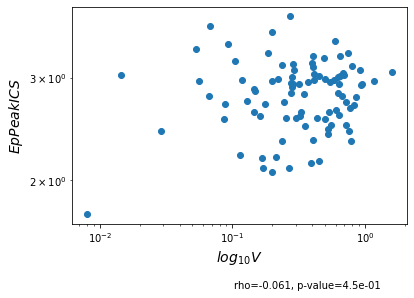

In [37]:
#correlation between EPeak/Variability for type II bursts
EpPeak = [float(result.EpPeakICS[i]) for i in files]
rho, pvalue = stats.spearmanr(EpPeak,  V_R01_list_sh) #reichart

fig, ax = plt.subplots()

ax.scatter(np.log10(V_R01_list_sh), np.log10(EpPeak))
ax.set_xscale("log")
ax.set_yscale("log")
plt.ylabel('$EpPeakICS$', fontsize=14)
plt.xlabel('$log_{10}V$', fontsize=14)

plt.figtext(0.5, -0.1, "rho={:.2g}, p-value={:.1e}".format(rho, pvalue))

Text(0.5, -0.1, 'rho=0.012, p-value=8.8e-01')

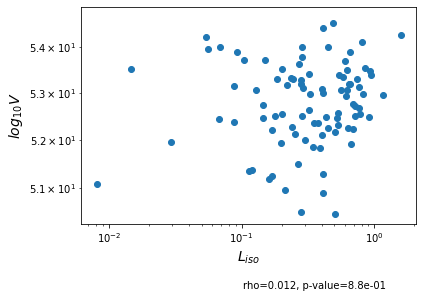

In [38]:
#correlation between Luminosity/Variability for type II bursts
Liso = [result.Liso[i] for i in files]
rho, pvalue = stats.spearmanr(Liso, V_R01_list_sh) #reichart


fig, ax = plt.subplots()

ax.scatter(np.log10(V_R01_list_sh), np.log10(Liso))
ax.set_xscale("log")
ax.set_yscale("log")
plt.xlabel('$L_{iso}$', fontsize=14)
plt.ylabel('$log_{10}V$', fontsize=14)

plt.figtext(0.5, -0.1, "rho={:.2g}, p-value={:.1e}".format(rho, pvalue))